## Analyzing and predicting the prices of AirBnB listings in European capitals

##### Author Roxana-Mihaela Milea

This jupyter notebook contains an exploratory data analysis and the use regression models to predict AirBnB prices, based on other variables, using a dataset with over 41,000 entries. 

The dataset is composed of 19 variables:

<div style="font-size: 12px;">
<table>
  <tr>
    <th>Column Name</th>
    <th>Description</th>
    <th>Column Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><code>City</code></td>
    <td>Name of the city where the listing is located</td>
    <td><code>Cleanliness Rating</code></td>
    <td>Cleanliness score (typically from 1 to 10)</td>
  </tr>
  <tr>
    <td><code>Price</code></td>
    <td>Price of the listing per night</td>
    <td><code>Guest Satisfaction</code></td>
    <td>Guest satisfaction score (from 0 to 100)</td>
  </tr>
  <tr>
    <td><code>Day</code></td>
    <td>Indicates whether the booking is for a weekday or weekend</td>
    <td><code>Bedrooms</code></td>
    <td>Number of bedrooms in the listing</td>
  </tr>
  <tr>
    <td><code>Room Type</code></td>
    <td>Type of room offered (e.g., Entire home, Private room, Shared room)</td>
    <td><code>City Center (km)</code></td>
    <td>Distance to the city center in kilometers</td>
  </tr>
  <tr>
    <td><code>Shared Room</code></td>
    <td>True if it’s a shared room, False otherwise</td>
    <td><code>Metro Distance (km)</code></td>
    <td>Distance to the nearest metro station in kilometers</td>
  </tr>
  <tr>
    <td><code>Private Room</code></td>
    <td>True if it’s a private room, False otherwise</td>
    <td><code>Attraction Index</code></td>
    <td>Score based on proximity to tourist attractions</td>
  </tr>
  <tr>
    <td><code>Person Capacity</code></td>
    <td>Maximum number of guests the listing can accommodate</td>
    <td><code>Normalised Attraction Index</code></td>
    <td>Normalized version of the attraction index</td>
  </tr>
  <tr>
    <td><code>Superhost</code></td>
    <td>True if the host is a Superhost, False otherwise</td>
    <td><code>Restraunt Index</code></td>
    <td>Score based on proximity to restaurants <br><em>(typo: should be Restaurant Index)</em></td>
  </tr>
  <tr>
    <td><code>Multiple Rooms</code></td>
    <td>1 if the host has multiple listings, 0 otherwise</td>
    <td><code>Normalised Restraunt Index</code></td>
    <td>Normalized version of the restaurant index <br><em>(typo: should be Restaurant)</em></td>
  </tr>
  <tr>
    <td><code>Business</code></td>
    <td>1 if the listing is business-ready, 0 otherwise</td>
    <td></td>
    <td></td>
  </tr>
</table>
</div>




#### Data Import & Cleaning

In [ ]:
import pandas as pd
import os

#Path for the file
file_path = r'C:\Users\Roxana\Desktop\DISERTATIE\Aemf1.csv'

#Verifying
if os.path.exists(file_path):
    print(f"Found: {file_path}")
else:
    print("Not found!")

#csv file 
df = pd.read_csv(file_path)

#Data details
df.info()
df.head()



Fișier găsit: C:\Users\Roxana\Desktop\DISERTATIE\Aemf1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms       

City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0      False               1         0                10.0   
1              4.0      False               0         0                 8.0   
2              2.0      False               0         1                 9.0   
3              4.0      False               0         1                 9.0   
4              2.0       True               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Attraction Index  Normalised Attraction Index  Restraunt Index  \
0         78.690379                     4.166708        98.253896   
1        631.176378                    33.421209       837.280757   
2         75.275877                     3.985908        95.386955   
3        493.272534                    26.119108       875.033098   
4        552.830324                    29.272733       815.305740   

   Normalised Restraunt Index  
0                    6.846473  
1                   58.342928  
2                    6.646700  
3                   60.973565  
4                   56.811677

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0      False               1         0                10.0   
1              4.0      False               0         0                 8.0   
2              2.0      False               0         1                 9.0   
3              4.0      False               0         1                 9.0   
4              2.0       True               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Attraction Index  Normalised Attraction Index  Restraunt Index  \
0         78.690379                     4.166708        98.253896   
1        631.176378                    33.421209       837.280757   
2         75.275877                     3.985908        95.386955   
3        493.272534                    26.119108       875.033098   
4        552.830324                    29.272733       815.305740   

   Normalised Restraunt Index  
0                    6.846473  
1                   58.342928  
2                    6.646700  
3                   60.973565  
4                   56.811677

In [ ]:
df.describe()

Price  Person Capacity  Multiple Rooms      Business  \
count  41714.000000     41714.000000    41714.000000  41714.000000   
mean     260.094423         3.237235        0.295273      0.341180   
std      279.408493         1.299459        0.456171      0.474112   
min       34.779339         2.000000        0.000000      0.000000   
25%      144.016085         2.000000        0.000000      0.000000   
50%      203.819274         3.000000        0.000000      0.000000   
75%      297.373358         4.000000        1.000000      1.000000   
max    18545.450285         6.000000        1.000000      1.000000   

       Cleanliness Rating  Guest Satisfaction      Bedrooms  City Center (km)  \
count        41714.000000        41714.000000  41714.000000      41714.000000   
mean             9.442274           93.103179      1.165939          2.679792   
std              0.889173            8.141745      0.638157          1.996684   
min              2.000000           20.000000      0.000000          0.015045   
25%              9.000000           90.000000      1.000000          1.275913   
50%             10.000000           95.000000      1.000000          2.253237   
75%             10.000000           98.000000      1.000000          3.584489   
max             10.000000          100.000000     10.000000         25.284557   

       Metro Distance (km)  Attraction Index  Normalised Attraction Index  \
count         41714.000000      41714.000000                 41714.000000   
mean              0.603921        293.905990                    11.719658   
std               0.706206        235.750055                     8.379161   
min               0.002301         15.152201                     0.926301   
25%               0.236693        124.371614                     5.510735   
50%               0.391220        228.920599                     9.951086   
75%               0.678702        394.000201                    15.467009   
max              14.273577       4513.563486                   100.000000   

       Restraunt Index  Normalised Restraunt Index  
count     41714.000000                41714.000000  
mean        626.692618                   25.553590  
std         520.644720                   18.484572  
min          19.576924                    0.592757  
25%         210.459574                   11.132052  
50%         519.583509                   21.814414  
75%         860.708156                   36.821356  
max        6696.156772                  100.000000

In [ ]:
#Convert bool into int int
df['Shared Room']=df['Shared Room']*1
df['Private Room']=df['Private Room']*1
df['Superhost']=df['Superhost']*1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  int64  
 5   Private Room                 41714 non-null  int64  
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  int64  
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [ ]:
df.describe()

Price   Shared Room  Private Room  Person Capacity  \
count  41714.000000  41714.000000  41714.000000     41714.000000   
mean     260.094423      0.007575      0.314858         3.237235   
std      279.408493      0.086707      0.464465         1.299459   
min       34.779339      0.000000      0.000000         2.000000   
25%      144.016085      0.000000      0.000000         2.000000   
50%      203.819274      0.000000      0.000000         3.000000   
75%      297.373358      0.000000      1.000000         4.000000   
max    18545.450285      1.000000      1.000000         6.000000   

          Superhost  Multiple Rooms      Business  Cleanliness Rating  \
count  41714.000000    41714.000000  41714.000000        41714.000000   
mean       0.279498        0.295273      0.341180            9.442274   
std        0.448758        0.456171      0.474112            0.889173   
min        0.000000        0.000000      0.000000            2.000000   
25%        0.000000        0.000000      0.000000            9.000000   
50%        0.000000        0.000000      0.000000           10.000000   
75%        1.000000        1.000000      1.000000           10.000000   
max        1.000000        1.000000      1.000000           10.000000   

       Guest Satisfaction      Bedrooms  City Center (km)  \
count        41714.000000  41714.000000      41714.000000   
mean            93.103179      1.165939          2.679792   
std              8.141745      0.638157          1.996684   
min             20.000000      0.000000          0.015045   
25%             90.000000      1.000000          1.275913   
50%             95.000000      1.000000          2.253237   
75%             98.000000      1.000000          3.584489   
max            100.000000     10.000000         25.284557   

       Metro Distance (km)  Attraction Index  Normalised Attraction Index  \
count         41714.000000      41714.000000                 41714.000000   
mean              0.603921        293.905990                    11.719658   
std               0.706206        235.750055                     8.379161   
min               0.002301         15.152201                     0.926301   
25%               0.236693        124.371614                     5.510735   
50%               0.391220        228.920599                     9.951086   
75%               0.678702        394.000201                    15.467009   
max              14.273577       4513.563486                   100.000000   

       Restraunt Index  Normalised Restraunt Index  
count     41714.000000                41714.000000  
mean        626.692618                   25.553590  
std         520.644720                   18.484572  
min          19.576924                    0.592757  
25%         210.459574                   11.132052  
50%         519.583509                   21.814414  
75%         860.708156                   36.821356  
max        6696.156772                  100.000000

### Exploratory Data Analysis (EDA)

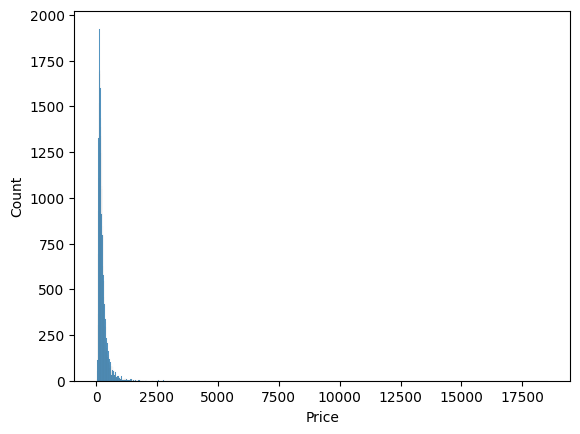

In [ ]:
sns.histplot(df['Price']);

#Conclusion: Outliers in the data, we want to not take them into consideration

In [9]:
q1=df['Price'].quantile(.25)
q3=df['Price'].quantile(.75)
iqr=q3-q1
print('first quartile is %.1f'%q1)
print('third quartile is %.1f'%q3)
print('interquartile range is %.1f'%iqr)

limit_low=q1-iqr*1.999
limit_high=q3+iqr*1.999
print('lower limit is%.1f'%limit_low)
print('upper limit is%.1f'%limit_high)

first quartile is 144.0
third quartile is 297.4
interquartile range is 153.4
lower limit is-162.5
upper limit is603.9


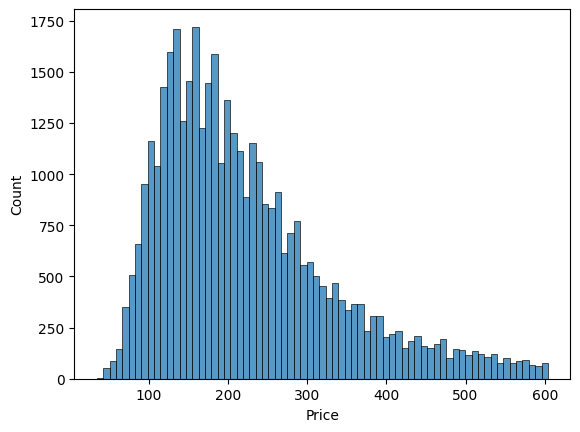

In [ ]:
df=df.query('Price < @limit_high')
sns.histplot(df['Price']);

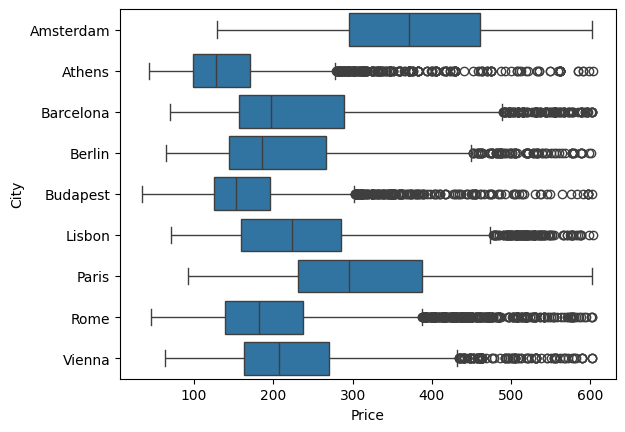

In [ ]:
sns.boxplot(df,y=df['City'],x=df['Price']);

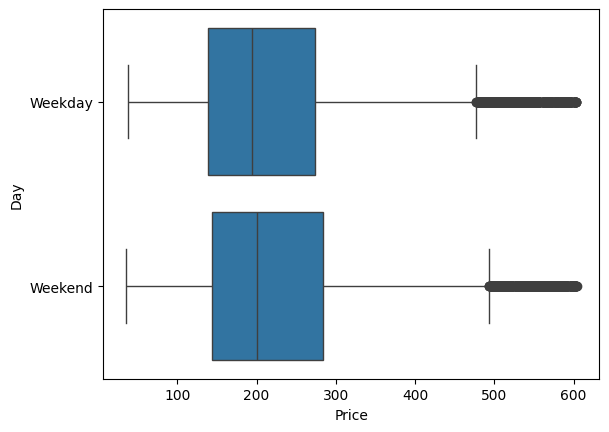

In [ ]:
sns.boxplot(df,y=df['Day'],x=df['Price']);

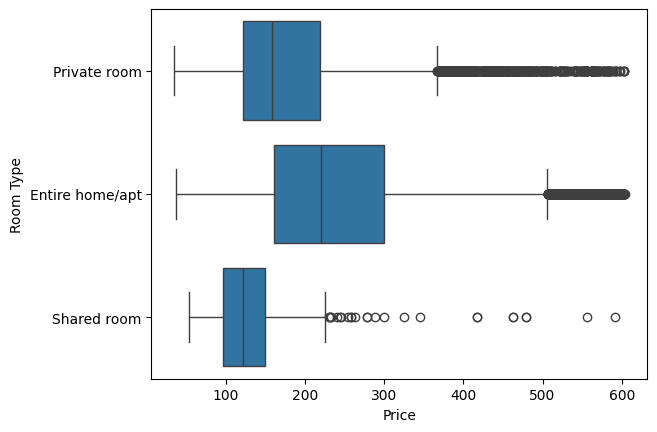

In [ ]:
sns.boxplot(df,y=df['Room Type'],x=df['Price']);

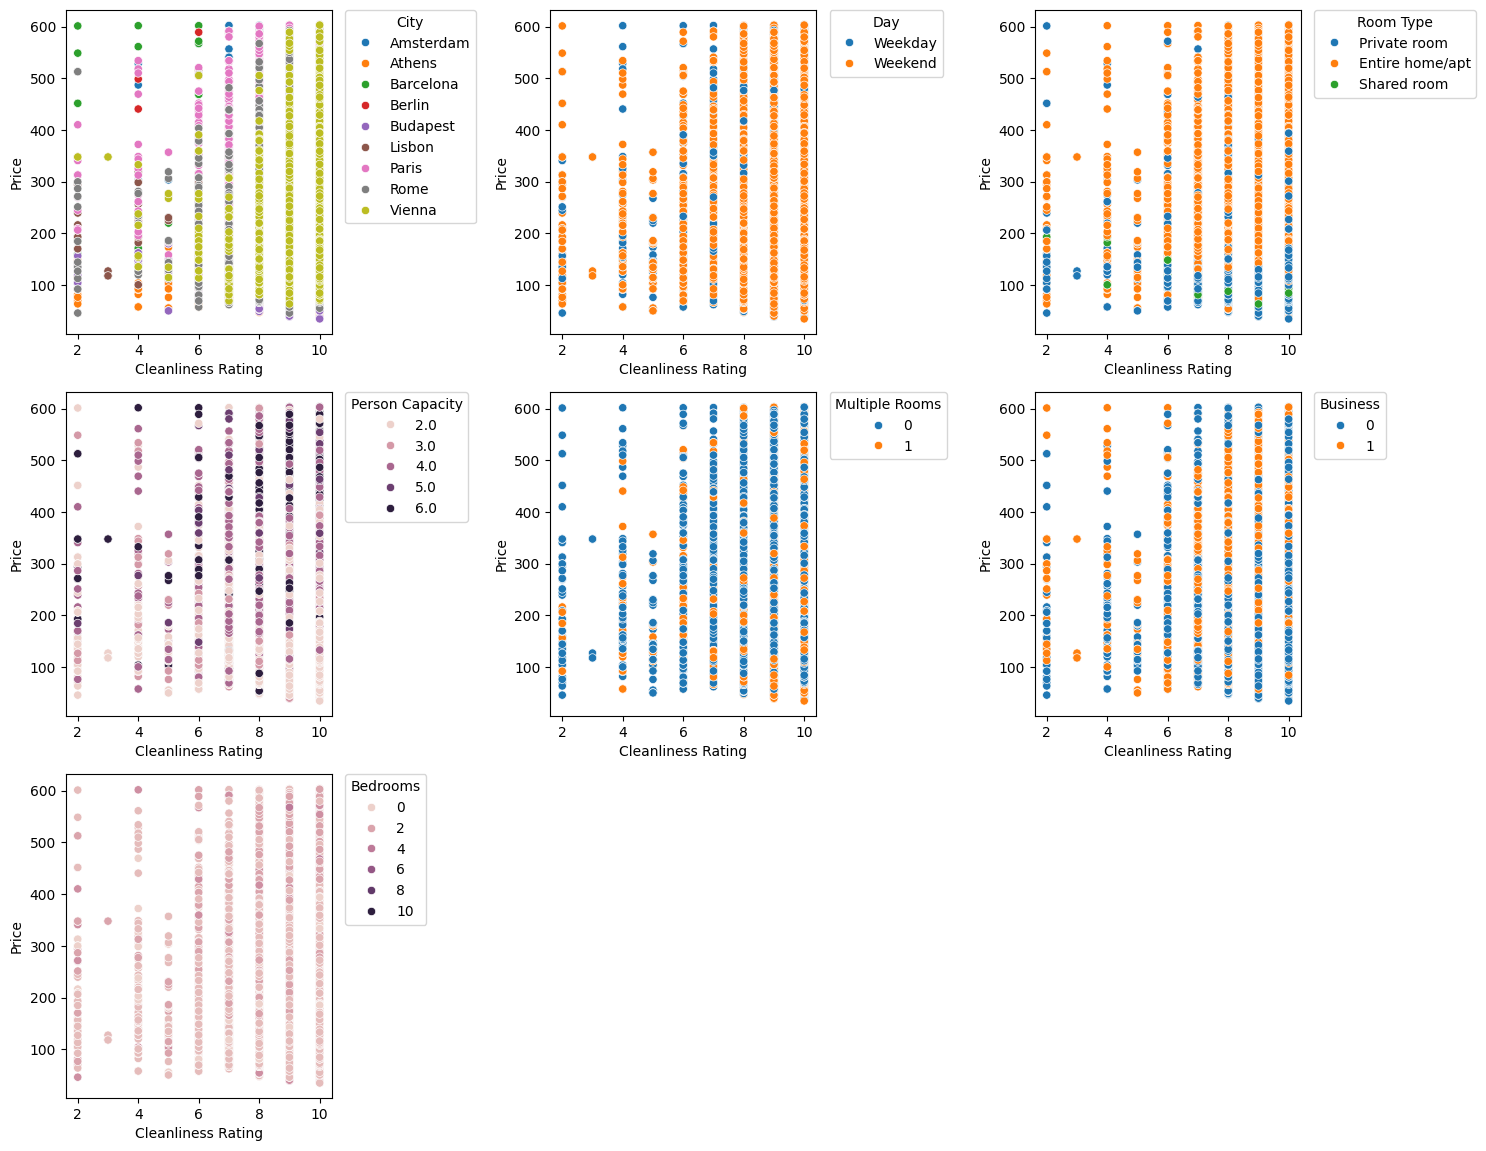

In [16]:
cat=['City', 'Day', 'Room Type',
       'Person Capacity', 'Multiple Rooms', 'Business',
       'Bedrooms']

fig = plt.figure(figsize=(15,15))

for i in range(len(cat)):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df,x=df['Cleanliness Rating'],y=df['Price'],hue=df[cat[i]])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0, fontsize=10,title = cat[i])
    
plt.tight_layout()
plt.show()

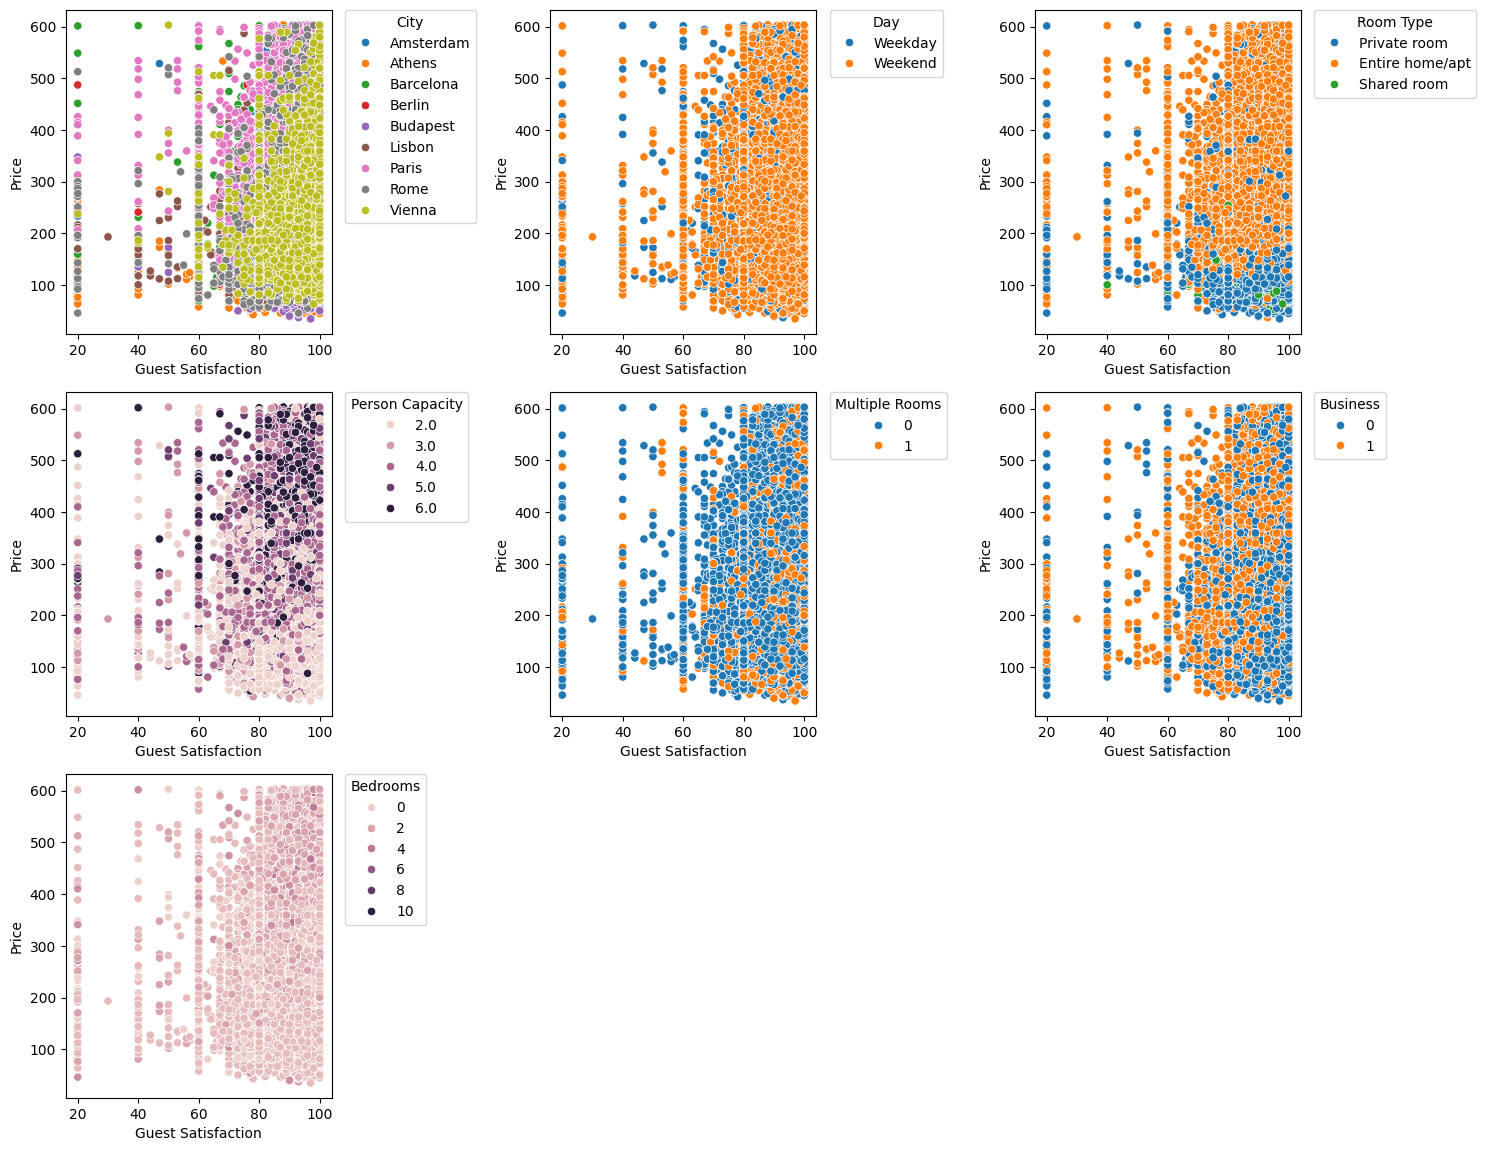

In [17]:
fig = plt.figure(figsize=(15,15))

for i in range(len(cat)):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df,x=df['Guest Satisfaction'],y=df['Price'],hue=df[cat[i]])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=cat[i],borderaxespad=0, fontsize=10)
    
plt.tight_layout()
plt.show()

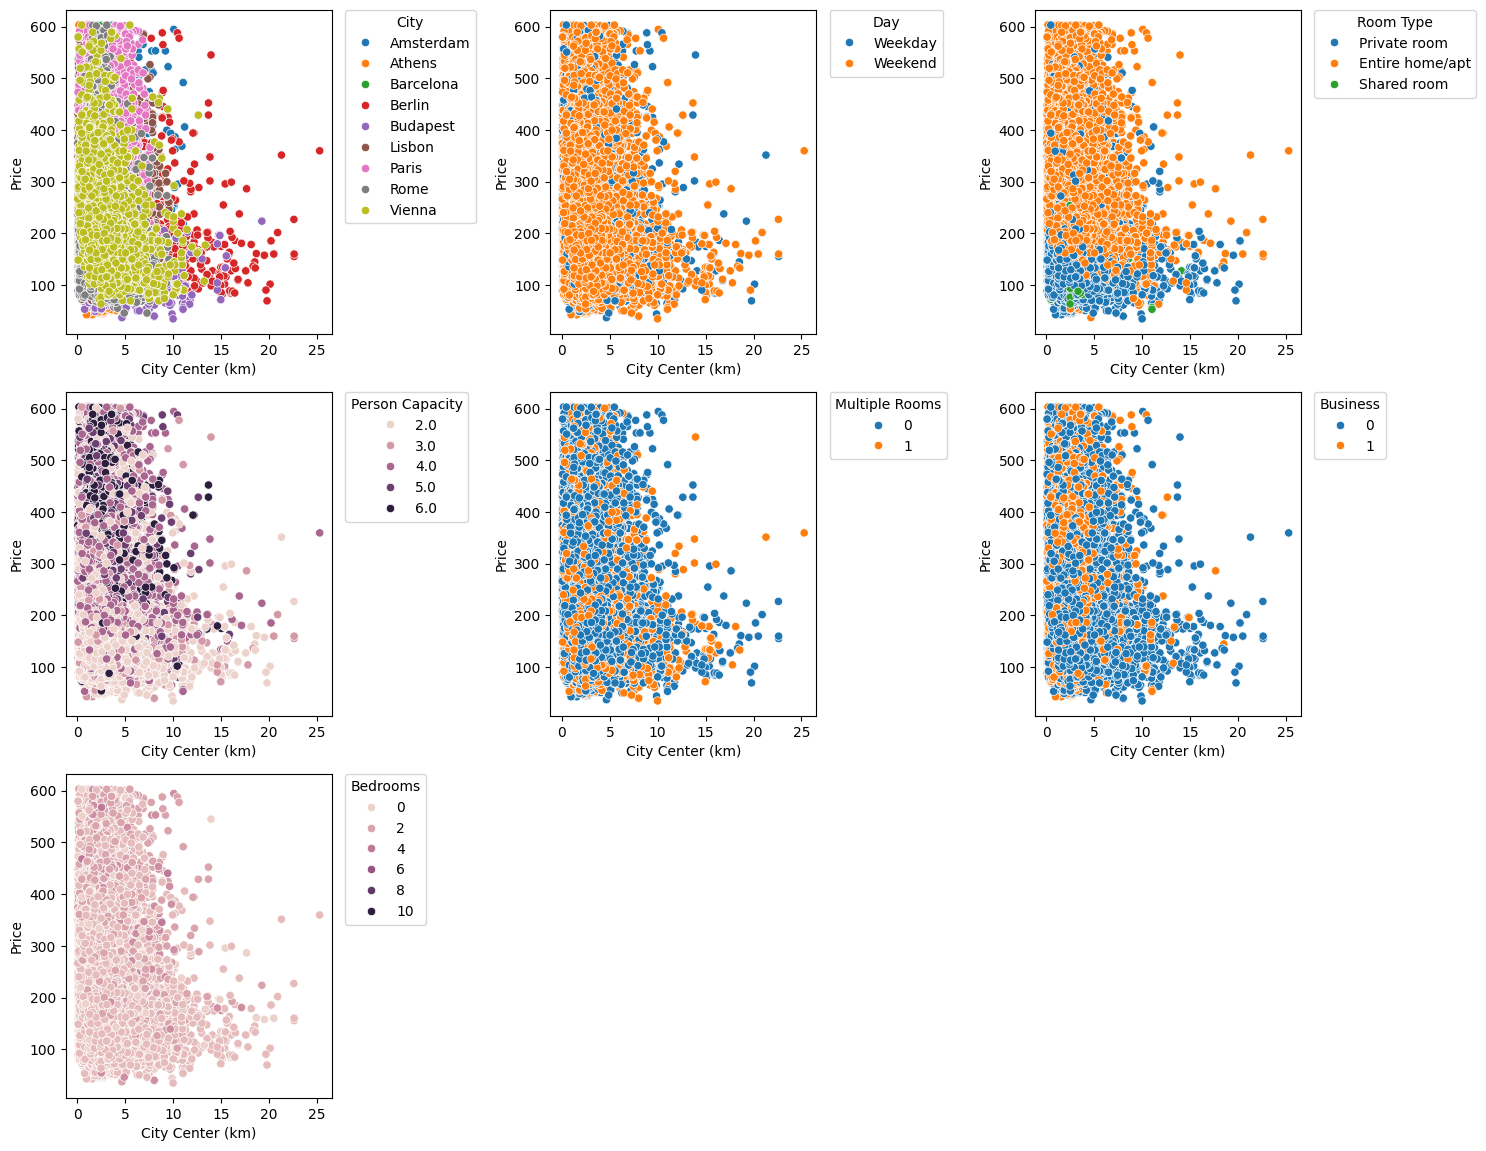

In [18]:
fig = plt.figure(figsize=(15,15))

for i in range(len(cat)):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df,x=df["City Center (km)"],y=df['Price'],hue=df[cat[i]])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=cat[i],borderaxespad=0, fontsize=10)
    
plt.tight_layout()
plt.show()

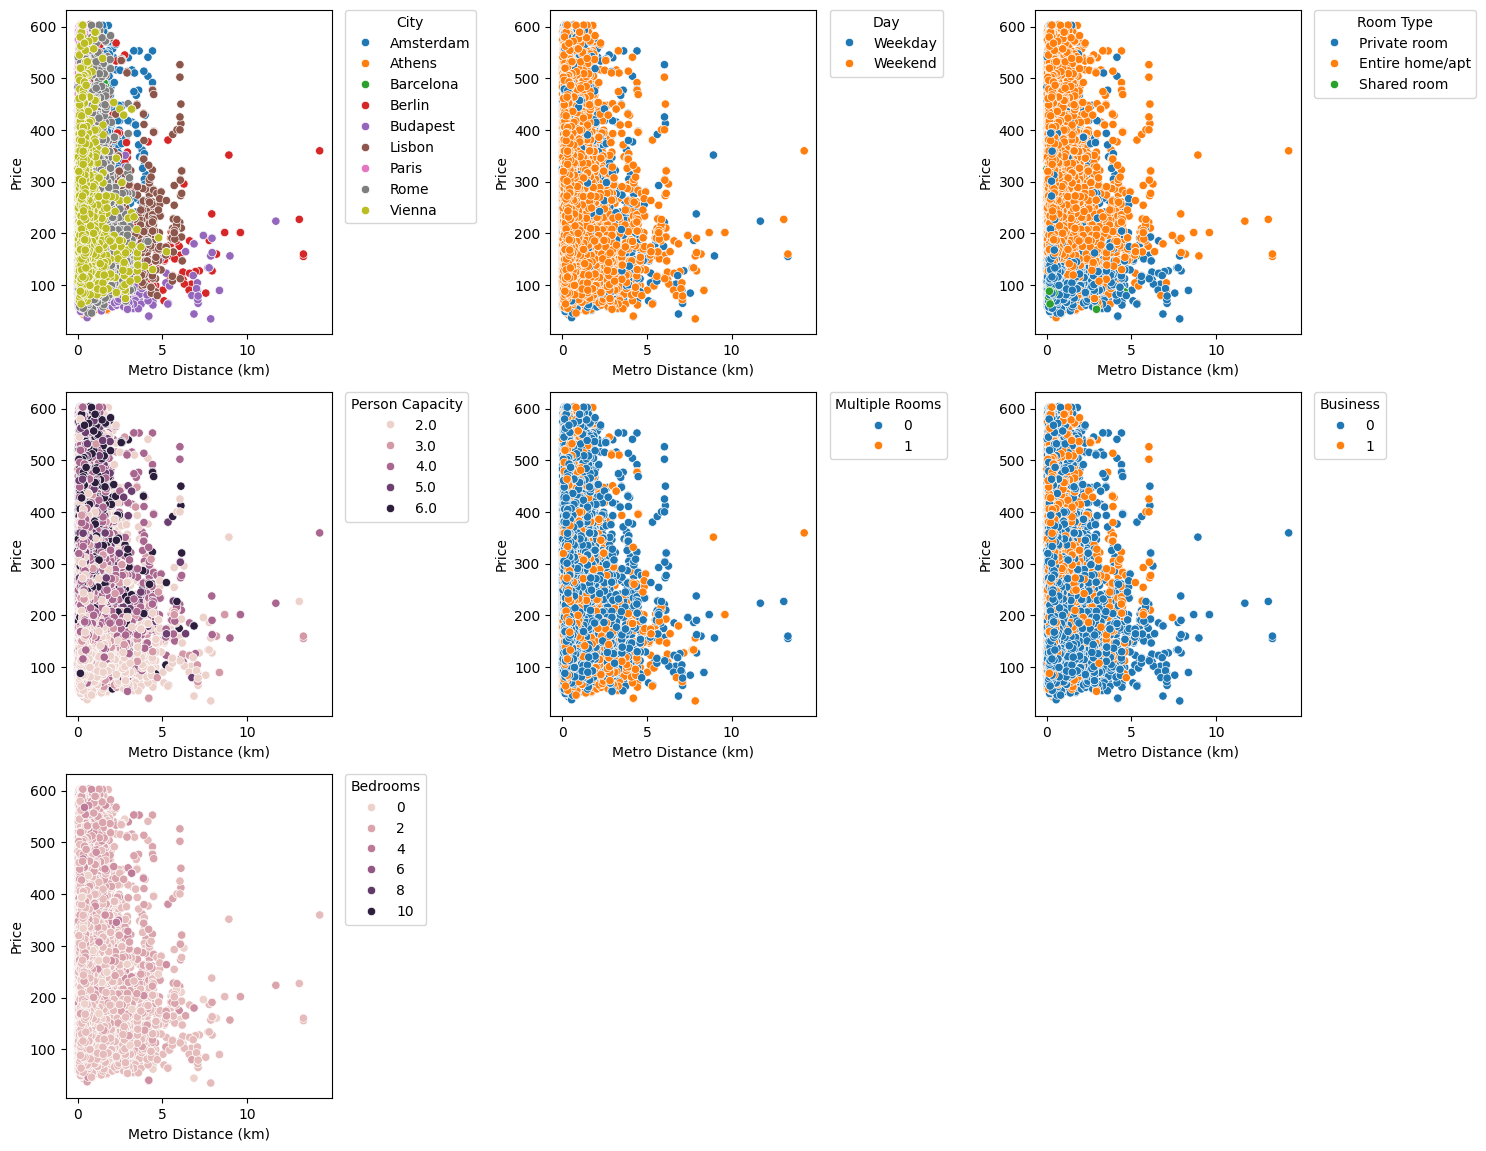

In [21]:
fig = plt.figure(figsize=(15,15))

for i in range(len(cat)):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df,x=df["Metro Distance (km)"],y=df['Price'],hue=df[cat[i]])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=cat[i],borderaxespad=0, fontsize=10)
    
plt.tight_layout()
plt.show()

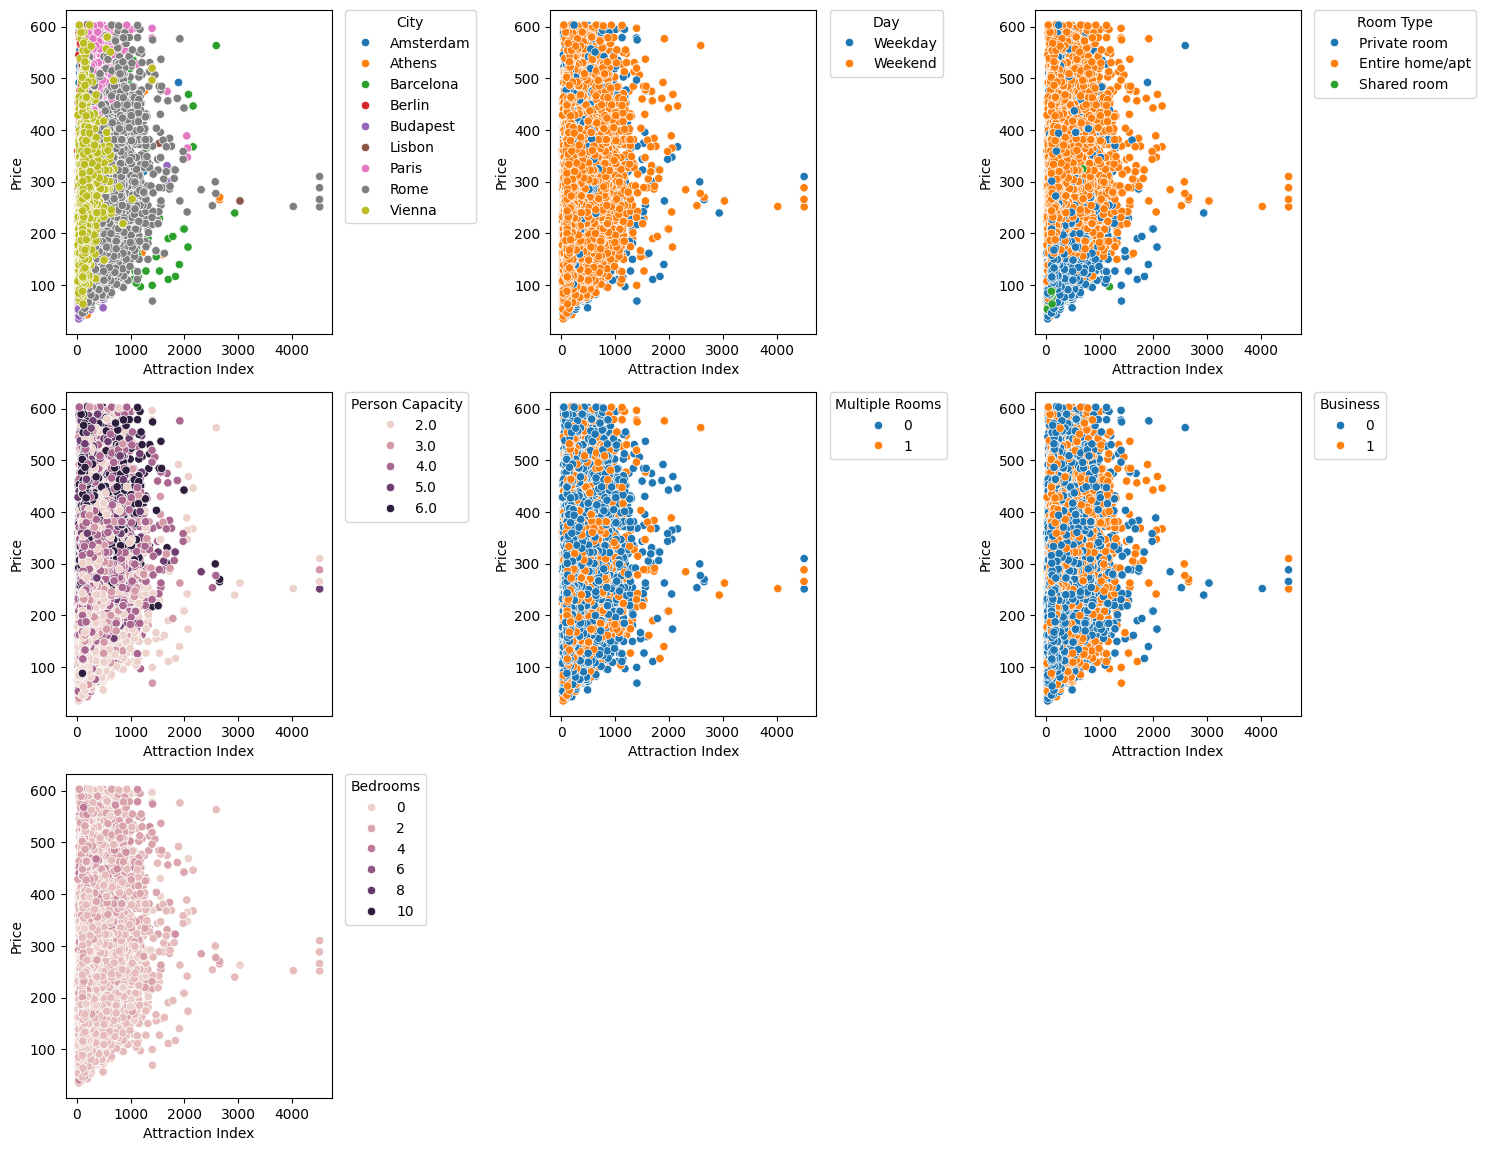

In [22]:
fig = plt.figure(figsize=(15,15))

for i in range(len(cat)):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df,x=df["Attraction Index"],y=df['Price'],hue=df[cat[i]])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=cat[i],borderaxespad=0, fontsize=10)
    
plt.tight_layout()
plt.show()

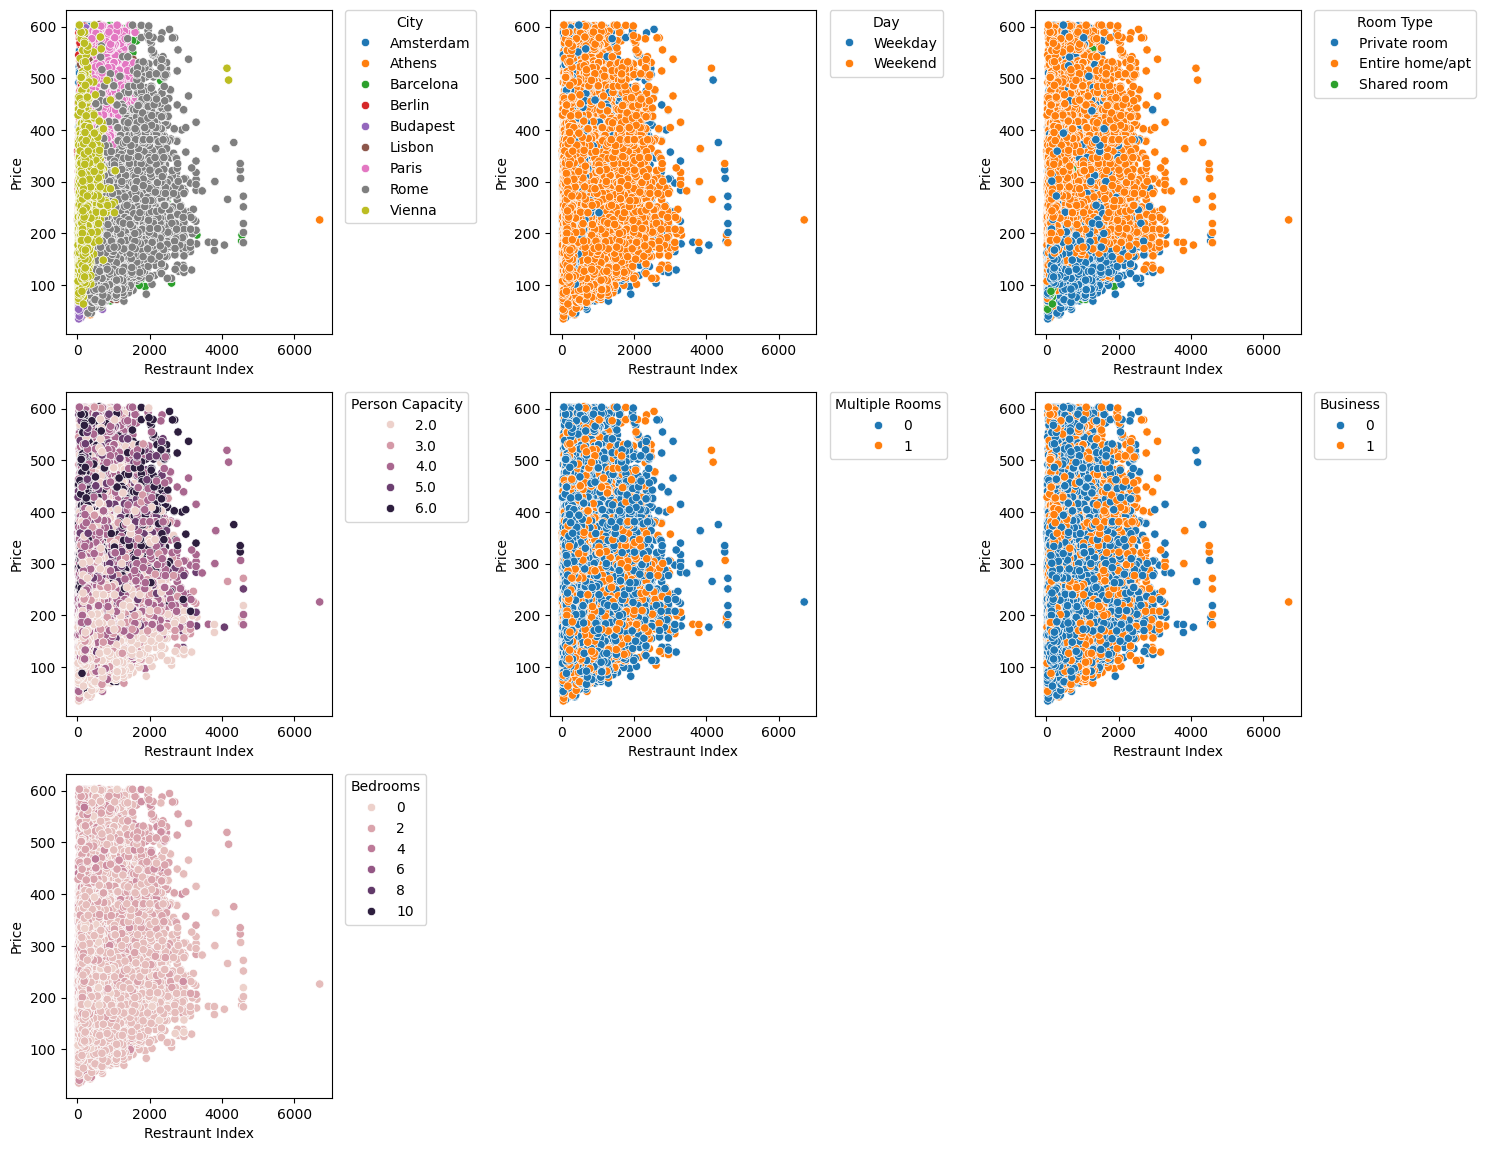

In [23]:
fig = plt.figure(figsize=(15,15))

for i in range(len(cat)):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df,x=df["Restraunt Index"],y=df['Price'],hue=df[cat[i]])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=cat[i],borderaxespad=0, fontsize=10)
    
plt.tight_layout()
plt.show()

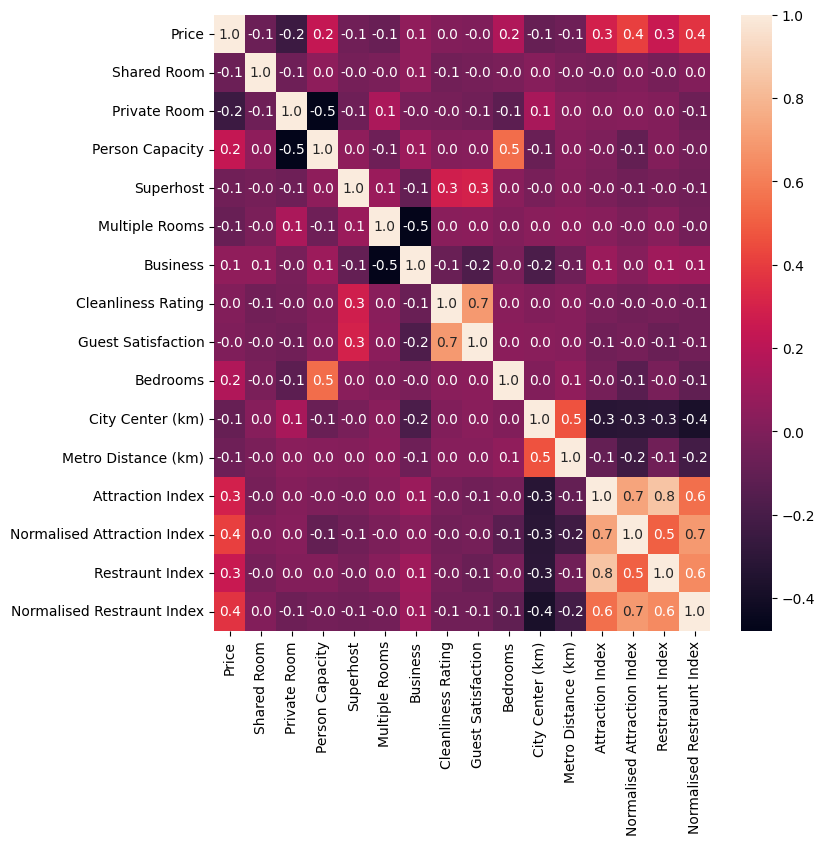

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".1f")
plt.show()

#### Data Modeling 

In [ ]:
X=df.drop(['Price','Shared Room','Private Room','Superhost','Attraction Index','Restraunt Index'],axis=1)
y=df['Price']


X=pd.get_dummies(X)

X.head()

Person Capacity  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0               1         0                10.0   
1              4.0               0         0                 8.0   
2              2.0               0         1                 9.0   
3              4.0               0         1                 9.0   
4              2.0               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Normalised Attraction Index  Normalised Restraunt Index  ...  \
0                     4.166708                    6.846473  ...   
1                    33.421209                   58.342928  ...   
2                     3.985908                    6.646700  ...   
3                    26.119108                   60.973565  ...   
4                    29.272733                   56.811677  ...   

   City_Budapest  City_Lisbon  City_Paris  City_Rome  City_Vienna  \
0          False        False       False      False        False   
1          False        False       False      False        False   
2          False        False       False      False        False   
3          False        False       False      False        False   
4          False        False       False      False        False   

   Day_Weekday  Day_Weekend  Room Type_Entire home/apt  \
0         True        False                      False   
1         True        False                      False   
2         True        False                      False   
3         True        False                      False   
4         True        False                      False   

   Room Type_Private room  Room Type_Shared room  
0                    True                  False  
1                    True                  False  
2                    True                  False  
3                    True                  False  
4                    True                  False  

[5 rows x 24 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Random Forest Regressor
reg1 = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='squared_error',  # Updated from 'mse'
    max_depth=None,
    max_features=1.0,           # Updated from 'auto'
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=-1,
    oob_score=False,
    random_state=123,
    verbose=0,
    warm_start=False
).fit(X_train, y_train)

# Extra Trees Regressor
reg2 = ExtraTreesRegressor(
    bootstrap=False,
    ccp_alpha=0.0,
    criterion='squared_error',  # Updated from 'mse'
    max_depth=None,
    max_features=1.0,           # Updated from 'auto'
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=-1,
    oob_score=False,
    random_state=123,
    verbose=0,
    warm_start=False
).fit(X_train, y_train)

# Print R2 scores
print('R2 of Random Forest:', reg1.score(X_test, y_test))
print('R2 of Extra Trees:', reg2.score(X_test, y_test))

R2 of Random Forest: 0.765004383371631
R2 of Extra Trees: 0.7694678236353183


<Figure size 1000x1000 with 0 Axes>

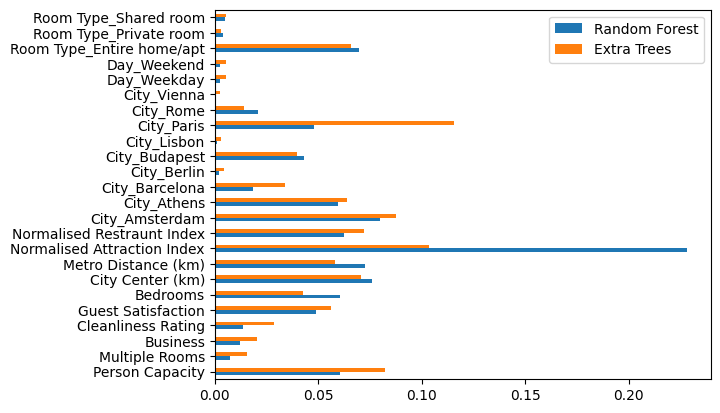

In [41]:
fti1 = pd.DataFrame(reg1.feature_importances_)
fti2 = pd.DataFrame(reg2.feature_importances_) 
fti1.index=X.columns
fti2.index=X.columns
fti1 = fti1.rename(columns={0: 'Random Forest'})
fti2 = fti2.rename(columns={0: 'Extra Trees'})
fti=pd.concat([fti1,fti2],axis=1)


plt.figure(figsize = (10,10))
fti.plot.barh();

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_rf = reg1.predict(X_test)
y_pred_et = reg2.predict(X_test)

print("Random Forest:")
print("  MAE:", mean_absolute_error(y_test, y_pred_rf))
print("  MSE:", mean_squared_error(y_test, y_pred_rf))

print("\nExtra Trees:")w
print("  MAE:", mean_absolute_error(y_test, y_pred_et))w
print("  MSE:", mean_squared_error(y_test, y_pred_et))w

Random Forest:
  MAE: 36.36307480902863
  MSE: 2893.5709708712025

Extra Trees:
  MAE: 34.72439245413987
  MSE: 2838.6113024206725


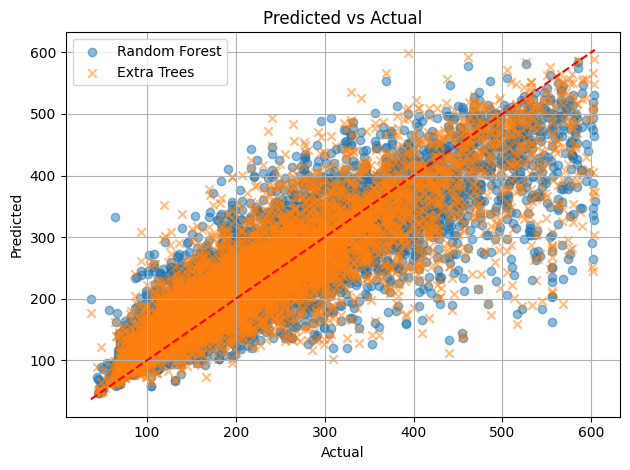

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_et, alpha=0.5, label='Extra Trees', marker='x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

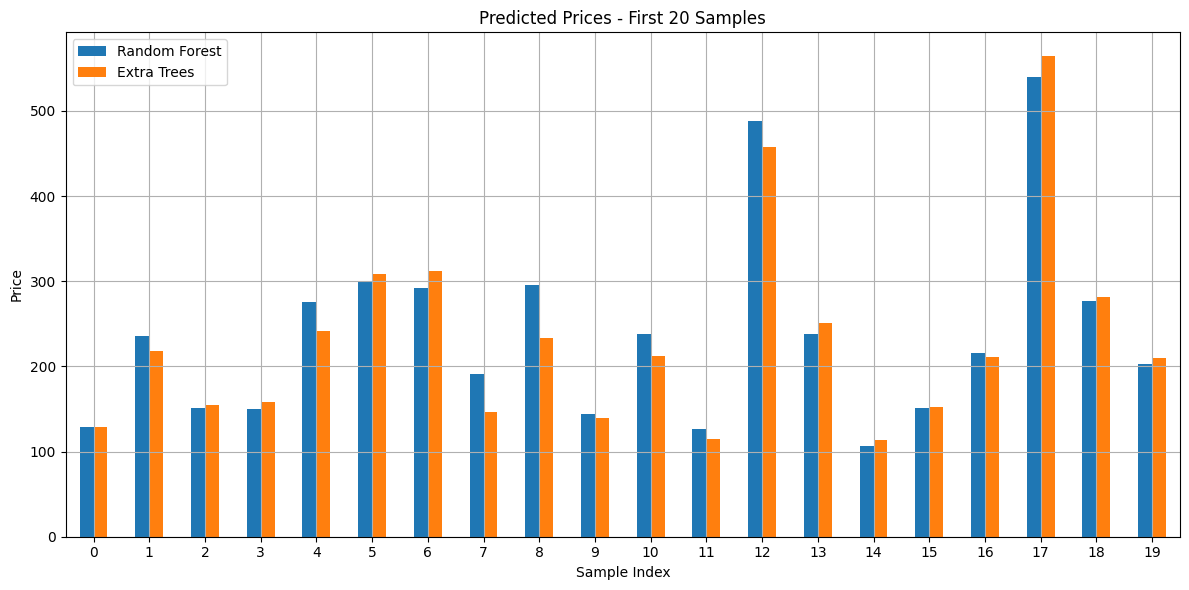

In [46]:
import pandas as pd

# Create a DataFrame for the first 20 predictions
df_pred = pd.DataFrame({
    'Random Forest': y_pred_rf[:20],
    'Extra Trees': y_pred_et[:20]
})

df_pred.plot(kind='bar', figsize=(12,6))
plt.title("Predicted Prices - First 20 Samples")
plt.ylabel("Price")
plt.xlabel("Sample Index")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Conclusion

The project demonstrates how statistical analysis and machine learning models can be used to predict AirBnB prices based on different features. The notebook also shows the importance of data cleaning, preprocessing, and visual analyses in preparing data for machine learning models and gaining valuable insights from it.

The analysis explores the relationships between the different variables with the purpose of identifying any interesting patterns or trends in the data and provides insights into the factors that affect listings prices in European capitals. It also demonstrates that regression models can be an effective tool for listing apartment prices based on these factors.

Overall, by performing different visualizations and analyses, this project provides insights into the factors affecting AirBnB prices in European capitals and demonstrates the potential of data analytics and machine learning algorithms in predicting real life prices. 

***
Made by: Roxana-Mihaela Milea
***